# Decesion Tree - Titanic Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
import seaborn as sns

In [2]:
df  = pd.read_csv('titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
# df.info()
# df.shape
# df.isnull().sum()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


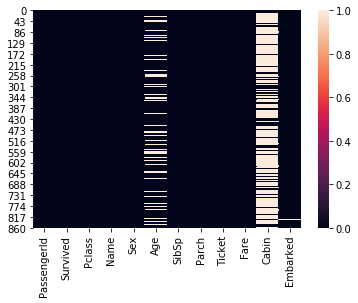

In [5]:
sns.heatmap(df.isnull())
# As per heat map the 'cabin' column feature has more missing data , so we gonna delete this feature

In [6]:
#df.columns = df.columns([['Passenger_Id'],[ 'Survived'], ['Pclass'], ['Name'], ['Sex'], ['Age'], 
 #                       ['SibSp'],['Parch'], ['Ticket'], ['Fare'], ['Cabin'], ['Embarked']],axis='columns')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# qwe = df.select_dtypes(include='object').head()

In [8]:
new_df = df.drop(['Name','Cabin','Ticket',],axis='columns')
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
new_df[new_df.Embarked.isnull()]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [10]:
new_df = new_df.drop([61,829],axis='rows')

In [11]:
new_df.Age.isnull().sum()

177

In [12]:
new_df.Age = new_df.Age.fillna(new_df.Age.interpolate())
new_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
# sns.heatmap(new_df.isnull(),yticklabels=False)

In [14]:
new_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# function for 'Sex'
def change_sex(sex):
    if sex == 'male':
        return 1
    if sex == 'female':
        return 0
    

new_df['sex'] = new_df.Sex.apply(change_sex)
new_df = new_df.drop(['Sex','Embarked','PassengerId'],axis='columns')

In [24]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,22.5,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [17]:
x = new_df.drop('Survived',axis='columns')
y = new_df.Survived

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


In [19]:
x_train.shape

(666, 6)

In [20]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
DT.score(x_train, y_train)


0.9924924924924925

In [22]:
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [23]:
DT.predict([[1,38,1,0,71,0]])

array([1], dtype=int64)